# Word2Vec 

Just some preliminary visualizations in Word2Vec...

In [2]:
# load packages
import os
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import Word
from gensim.models import Word2Vec
import multiprocessing 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# set cores, grab stop words
cores_available = multiprocessing.cpu_count() - 1
stop = stopwords.words('english')

In [2]:
os.chdir("/sfs/qumulo/qhome/kb7hp/git/dspg21oss/data/dspg21oss/")
repo_data = pd.read_csv("github_repos_157k.csv")
repo_data['description_clean'] = repo_data['description'].str.lower()
repo_data['description_clean'] = repo_data['description_clean'].str.replace(r'[^\w\s]+', '', regex=True)
repo_data['description_clean'] = repo_data['description_clean'].apply(lambda x:' '.join(x for x in x.split() if  not x.isdigit()))
repo_data['description_clean'] = repo_data['description_clean'].apply(lambda x:' '.join(x for x in x.split() if not x in stop))
repo_data['description_clean'] = repo_data['description_clean'].apply(lambda x:' '.join([Word(word).lemmatize() for word in x.split()]))
repo_data.head()

,slug,description,readme,language,topics,commits,forks,stars,watchers,description_clean
0,vuejs/vue,"🖖 Vue.js is a progressive, incrementally-adopt...","<p align=""center""><a href=""https://vuejs.org"" ...",JavaScript,"['vue', 'javascript', 'frontend', 'framework']",3070,29611,185611,6250,vuejs progressive incrementallyadoptable javas...
1,facebook/react,"A declarative, efficient, and flexible JavaScr...",# [React](https://reactjs.org/) · [![GitHub li...,JavaScript,"['javascript', 'react', 'frontend', 'declarati...",12695,34352,171327,6718,declarative efficient flexible javascript libr...
2,tensorflow/tensorflow,An Open Source Machine Learning Framework for ...,"<div align=""center"">\n<img src=""https://www.te...",C++,"['tensorflow', 'machine-learning', 'python', '...",75671,84937,156754,8092,open source machine learning framework everyone
3,twbs/bootstrap,"The most popular HTML, CSS, and JavaScript fra...","<p align=""center"">\n<a href=""https://getbootst...",JavaScript,"['css', 'bootstrap', 'javascript', 'html', 'sc...",19228,73981,151778,7079,popular html cs javascript framework developin...
4,ohmyzsh/ohmyzsh,🙃 A delightful community-driven (with 1700+ c...,"<p align=""center""><img alt=""Oh My Zsh"" src=""ht...",Shell,"['shell', 'zsh-configuration', 'theme', 'termi...",5447,22232,129314,2678,delightful communitydriven contributor framewo...


In [5]:
repo_list=[]
for i in repo_data['description_clean']:
    li = list(i.split(" "))
    repo_list.append(li)
repo_model = Word2Vec(repo_list, min_count=5, size=512, window=5, iter=5, workers=cores_available)

os.chdir("/sfs/qumulo/qhome/kb7hp/git/dspg21oss/data/dspg21oss/")
repo_model.save("repo_w2v_157k.bin")

In [3]:
os.chdir("/sfs/qumulo/qhome/kb7hp/git/dspg21oss/data/dspg21oss/")
repo_model = Word2Vec.load("repo_w2v_157k.bin")
print("Model loaded")

Model loaded


In [39]:
top_words = repo_model.wv.most_similar(positive=['blockchain'], topn=30)
top_words

[('decentralized', 0.928371787071228),
 ('ethereum', 0.9198849201202393),
 ('exchange', 0.8868039846420288),
 ('cryptocurrency', 0.8639328479766846),
 ('explorer', 0.8440132141113281),
 ('p2p', 0.8339221477508545),
 ('wallet', 0.8110809326171875),
 ('smart', 0.8083429336547852),
 ('bitcoin', 0.8078486919403076),
 ('stack', 0.8050074577331543),
 ('networking', 0.804531455039978),
 ('peertopeer', 0.7961329221725464),
 ('communication', 0.7855268716812134),
 ('crypto', 0.7847946882247925),
 ('lightning', 0.7765512466430664),
 ('eos', 0.7748005390167236),
 ('contract', 0.7723634839057922),
 ('dapp', 0.7648385167121887),
 ('messaging', 0.7639201879501343),
 ('blockchainbased', 0.7634549140930176),
 ('noncustodial', 0.7620911598205566),
 ('yoti', 0.7582013607025146),
 ('ecosystem', 0.7576109170913696),
 ('fabric', 0.7574518322944641),
 ('connecting', 0.7572524547576904),
 ('cash', 0.7568660974502563),
 ('opcua', 0.7543013095855713),
 ('chain', 0.7459646463394165),
 ('microservices', 0.745933

In [5]:
%%capture
repo_vocab = list(repo_model.wv.vocab)
repo_x = repo_model[repo_vocab]
repo_tsne = TSNE(n_components=2)
repo_tsne_x = repo_tsne.fit_transform(repo_x)
repo_df = pd.DataFrame(repo_tsne_x, index=repo_vocab, columns=['x', 'y'])

keys = ['python', 'javascript', 'java', 'c', 'r', 'php', 'database', 'ai', 'ml', 'visualization', 'server', 'mac', 'linux']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in repo_model.wv.most_similar(word, topn=15):
        words.append(similar_word)
        embeddings.append(repo_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

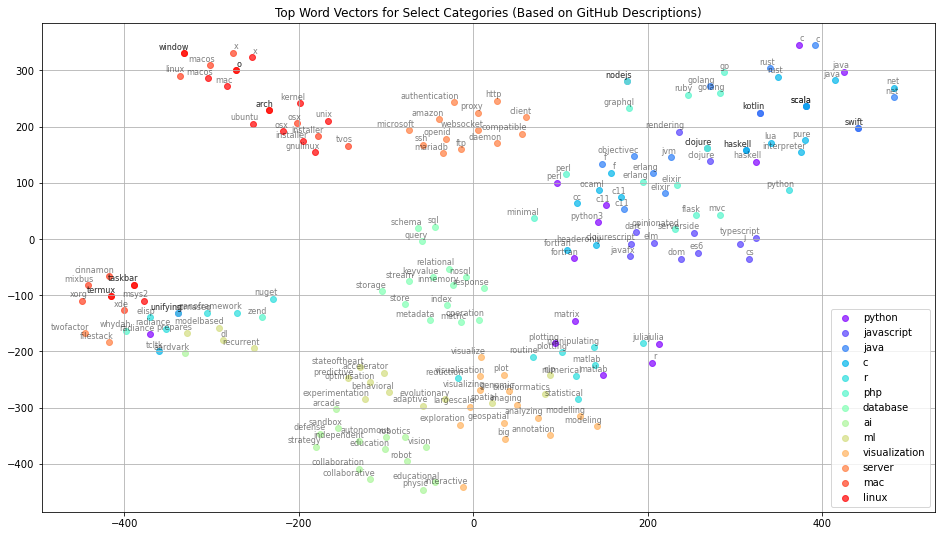

In [6]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()
    
cats_plot = tsne_plot_similar_words('Top Word Vectors for Select Categories (Based on GitHub Descriptions)', 
                                    keys, embeddings_en_2d, word_clusters, 0.7, 'cats_plot.png')
cats_plot